## Geometric interpretation of PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. The main idea behind PCA is to transform the original variables of a dataset into a new set of uncorrelated variables called principal components. These components are linear combinations of the original variables, ordered in such a way that the first principal component captures the most variance in the data, the second principal component captures the second most, and so on.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define the unit vector
$\mathbf{v}_1 = \begin{pmatrix} \cos(\theta_1) \\ \sin(\theta_1)\end{pmatrix}$
where $\theta = \pi/6$ and a unit vector $\mathbf{v}_2 \perp \mathbf{v}_1$.

A unit vector is a vector with a length (or magnitude) of 1.

In [1]:
import numpy as np

# Define the angle theta in radians
theta1 = np.pi / 6

# Create the unit vector v1
v1 = np.array([np.cos(theta1), np.sin(theta1)])

# Rotate v1 by 90 degrees to get a vector perpendicular to v1
v2 = np.array([-v1[1], v1[0]])

# Normalize v2 to make it a unit vector
v2 = v2 / np.linalg.norm(v2)

# Print the results
print("Unit vector v1:", v1)
print("Unit vector v2 perpendicular to v1:", v2)

Unit vector v1: [0.8660254 0.5      ]
Unit vector v2 perpendicular to v1: [-0.5        0.8660254]


Define the point $\mathbf{b} = \begin{pmatrix} 20 \\ 30\end{pmatrix}$

In [2]:
import numpy as np

# Define the point b
b = np.array([20, 30])

# Print the result
print("Point b:", b)

Point b: [20 30]


Generate $n = 1000$ points $\mathbf{x}_i$ according to the formula:

$\mathbf{x}_i = \mathbf{b} + r_{1,i} \rho_1 \mathbf{v}_1 + r_{2,i} \rho_2 \mathbf{v}_2$

where $\rho_1 = 12$, $\rho_2 = 3$ and the $r_{i,j}$ are real numbers independently generated according to a normal distribution.

Plot the generated numbers in a plane, showing the directions $\mathbf{v}_1$ and $\mathbf{v}_2$, rescaled by $\rho_1$ and $\rho_2$, respectivaly.

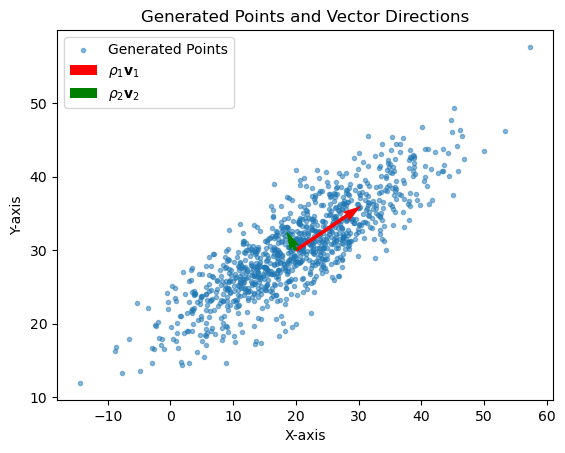

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Define the parameters
rho1 = 12
rho2 = 3
b = np.array([20, 30])
num_points = 1000

# Generate random numbers from a normal distribution
r1 = np.random.randn(num_points)
r2 = np.random.randn(num_points)

# Reshape r1 and r2 to 2D arrays
r1 = r1[:, np.newaxis]
r2 = r2[:, np.newaxis]

# Define the unit vectors v1 and v2
theta1 = np.pi / 6
v1 = np.array([np.cos(theta1), np.sin(theta1)])
v2 = np.array([-v1[1], v1[0]])

# Generate the points xi using the given formula
xi = b + r1 * rho1 * v1 + r2 * rho2 * v2

# Plot the points and vector directions
plt.scatter(xi[:, 0], xi[:, 1], marker='.', alpha=0.5, label='Generated Points')

# Create arrays for vector directions at point b
v1_scaled = rho1 * v1
v2_scaled = rho2 * v2

# Plot vector directions at point b
plt.quiver(*b, *v1_scaled, color='r', scale=1, scale_units='xy', angles='xy', label=r'$\rho_1 \mathbf{v}_1$')
plt.quiver(*b, *v2_scaled, color='g', scale=1, scale_units='xy', angles='xy', label=r'$\rho_2 \mathbf{v}_2$')

# Set plot labels and legend
plt.title('Generated Points and Vector Directions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()


Perform PCA on the matrix $X$:

$\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$

$\overline{X} = X - \boldsymbol{\mu} [1,\dots,1]$

$\overline{X} = U \Sigma V^T$

In [8]:
# Step 1: Compute the Mean Vector
mu = np.mean(xi, axis=0)

# Step 2: Center the Data Matrix
X_centered = xi - mu

# Step 3: Compute the Covariance Matrix
C = np.cov(X_centered, rowvar=False)

# Step 4: Compute the Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Sort eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Check that the eigenvectors are unit vectors
for i in range(eigenvectors.shape[1]):
    assert np.isclose(np.linalg.norm(eigenvectors[:, i]), 1)

# Check that the decomposition holds
reconstructed_C = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), eigenvectors.T)

# Output the results
print("Mean Vector (mu):\n", mu)
print("\nCovariance Matrix (C):\n", C)
print("\nEigenvectors (U):\n", eigenvectors)
print("\nEigenvalues (Sigma):\n", eigenvalues)

Mean Vector (mu):
 [20.09465026 30.30003028]

Covariance Matrix (C):
 [[107.02608069  55.20126356]
 [ 55.20126356  40.00455134]]

Eigenvectors (U):
 [[-0.87147278  0.49044387]
 [-0.49044387 -0.87147278]]

Eigenvalues (Sigma):
 [138.09202116   8.93861087]


Plot the first two singular vectors, rescaled by the root of the sample variance:

${\sqrt{\frac{\sigma_1^2}{(n - 1)}}}{\mathbf{u}_1}, {\sqrt{\frac{\sigma_2^2}{(n - 1)}}}{\mathbf{u}_2}$

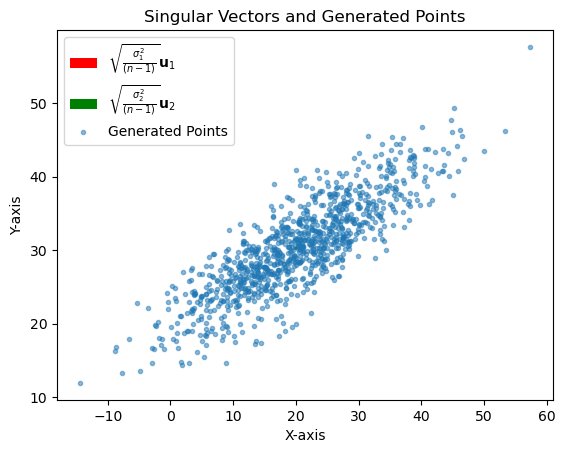

In [9]:
#Compute the Singular Value Decomposition
_, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Rescale the first two singular vectors by the root of the sample variance
rescaled_u1 = np.sqrt(s[0] / (len(xi) - 1)) * Vt[0]
rescaled_u2 = np.sqrt(s[1] / (len(xi) - 1)) * Vt[1]

# Plot the first two singular vectors
plt.quiver(*mu, *rescaled_u1, color='r', scale=1, scale_units='xy', angles='xy', label=r'$\sqrt{\frac{\sigma_1^2}{(n - 1)}}\mathbf{u}_1$')
plt.quiver(*mu, *rescaled_u2, color='g', scale=1, scale_units='xy', angles='xy', label=r'$\sqrt{\frac{\sigma_2^2}{(n - 1)}}\mathbf{u}_2$')

# Plot the generated points
plt.scatter(xi[:, 0], xi[:, 1], marker='.', alpha=0.5, label='Generated Points')

# Set plot labels and legend
plt.title('Singular Vectors and Generated Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

Compute the principal components of the data:

$\Phi = U^T \overline{X}$

Make a scatterplot of the two first principal components ($\phi_1$, $\phi_2$)

In [ ]:
#Compute the Principal Components
principal_components = np.dot(X_centered, Vt.T)

# Output the results
print("Principal Components (Phi):\n", principal_components)

# Scatterplot of the first two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], marker='.', alpha=0.5)
plt.title('Scatterplot of Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()